## Text Classification

In [1]:
st = 'Hi All! Welcome to Text Classification.'

In [2]:
st = st.lower()
st

'hi all! welcome to text classification.'

In [3]:
import re
st = re.sub("[^a-z0-9 ]", "", st)

In [4]:
st

'hi all welcome to text classification'

In [5]:
def text_preprocessor(st):
    pre = st.lower()
    pre = re.sub("[^a-z0-9 ]", "", pre)
    return pre

### Read the tsv (Tab Sepreated Values)

In [6]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
df['Review'] = df['Review'].apply(text_preprocessor)

In [9]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


### Apply TFIDF Vectorizer on Reviews

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
Y = df[['Liked']]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


### Perform train test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
xtrain.shape

(800, 1852)

In [14]:
xtest.shape

(200, 1852)

In [15]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [16]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


In [17]:
xtrain.shape[1]

1852

### Create a neural network

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [19]:
model = Sequential()

# Hidden Layer 1
model.add(Dense(256, activation='relu', input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Hidden Layer 2
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               474368    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

### Compile the model

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
early_stop = EarlyStopping(patience=15, monitor='val_loss')

### Fit the model

In [23]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, callbacks=[early_stop])

Epoch 1/100
25/25 [==============================] - 5s 36ms/step - loss: 0.7904 - accuracy: 0.5838 - val_loss: 0.6865 - val_accuracy: 0.6750
Epoch 2/100
25/25 [==============================] - 0s 13ms/step - loss: 0.2709 - accuracy: 0.8938 - val_loss: 0.6795 - val_accuracy: 0.6700
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.1186 - accuracy: 0.9750 - val_loss: 0.6732 - val_accuracy: 0.6500
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.6650 - val_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0548 - accuracy: 0.9900 - val_loss: 0.6577 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0291 - accuracy: 0.9962 - val_loss: 0.6484 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0257 - accuracy: 0.9962 - val_loss: 0.6363 - val_accuracy: 0.6800
Epoch 

### Model evaluation

In [24]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 0.9975


[0.0043051764369010925, 0.9975000023841858]

In [25]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 5ms/step - loss: 0.8993 - accuracy: 0.7100


[0.8992549777030945, 0.7099999785423279]

#### Predict data for train and test

In [26]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 5ms/step


In [27]:
yprob_tr[0:5]

array([[5.186442e-04],
       [9.993184e-01],
       [6.863049e-04],
       [3.650117e-03],
       [9.999831e-01]], dtype=float32)

In [28]:
yprob_ts[0:5]

array([[0.02559161],
       [0.9999877 ],
       [0.91493845],
       [0.9994696 ],
       [0.9960862 ]], dtype=float32)

### Predict the values

In [29]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr.flatten()]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts.flatten()]

In [30]:
ypred_tr[0:5]

[0, 1, 0, 0, 1]

In [31]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [32]:
ypred_ts[0:5]

[0, 1, 1, 1, 1]

In [33]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


### Show the confusion matrix for test

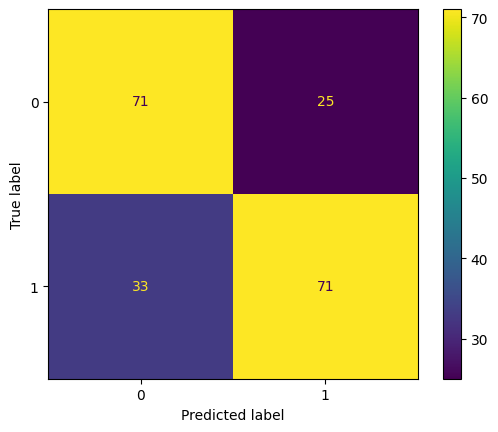

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        96
           1       0.74      0.68      0.71       104

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



### Save this model for future use

In [36]:
model.save('RestaurantSentiments.keras')

### Save tfidf as pickle

In [37]:
import pickle
with open('Vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)   